**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

**Time-series forecasting** is a crucial task in various **fields, including finance, economics, and weather prediction**. In this question, you'll work with **Long Short-Term Memory (LSTM)** networks, **a type of recurrent neural network (RNN)** that is particularly effective at *learning from sequences of data*.

**LSTMs** are designed **to capture long-term dependencies in time-series data**, making them well-suited **for predicting future values based on historical patterns.**

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the *closing prices of a stock to predict future prices*, which is a *common real-world application of time-series analysis in financial markets*. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [5]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [7]:
# Load Data
file_path = './GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [8]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the **length** of the input sequence, meaning we will **use the past 60 days of stock prices to predict the next day's closing price**. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [9]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [10]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [11]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [12]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***


Training config: units=32, layers=1, dropout=0.2, epochs=20, batch=32
Test MAE: 0.09361 | Test Loss (MAE): 0.09361


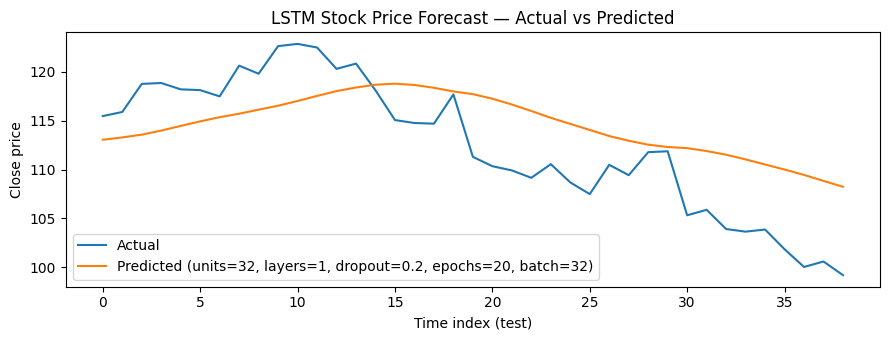


Training config: units=32, layers=1, dropout=0.2, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10030 | Test Loss (MAE): 0.10030


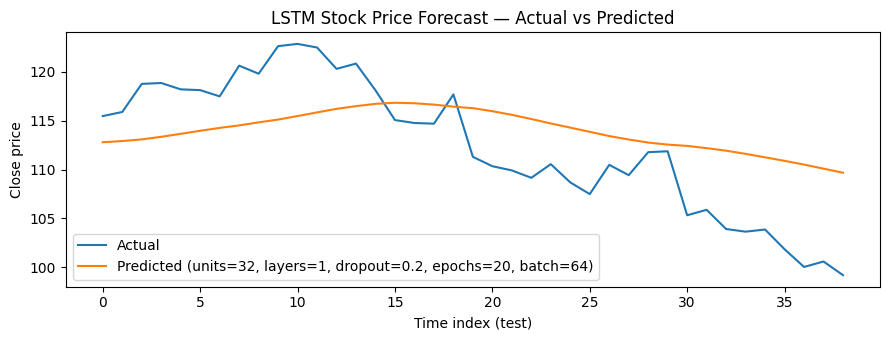


Training config: units=32, layers=1, dropout=0.2, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09912 | Test Loss (MAE): 0.09912


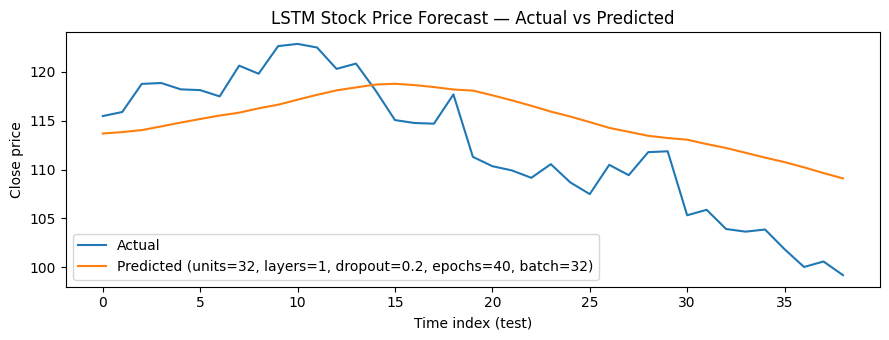


Training config: units=32, layers=1, dropout=0.2, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09754 | Test Loss (MAE): 0.09754


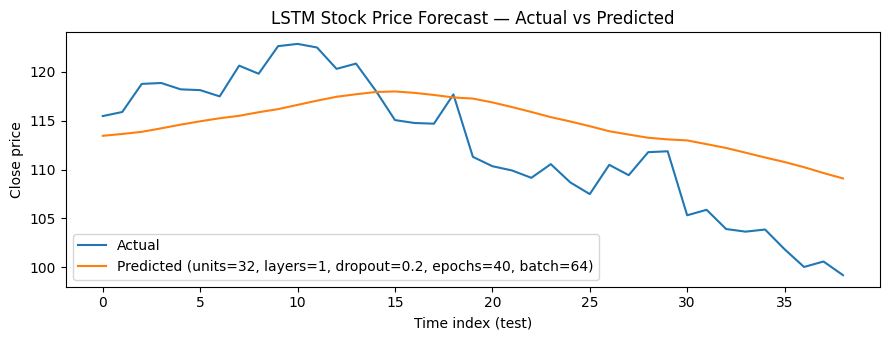


Training config: units=32, layers=1, dropout=0.3, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11209 | Test Loss (MAE): 0.11209


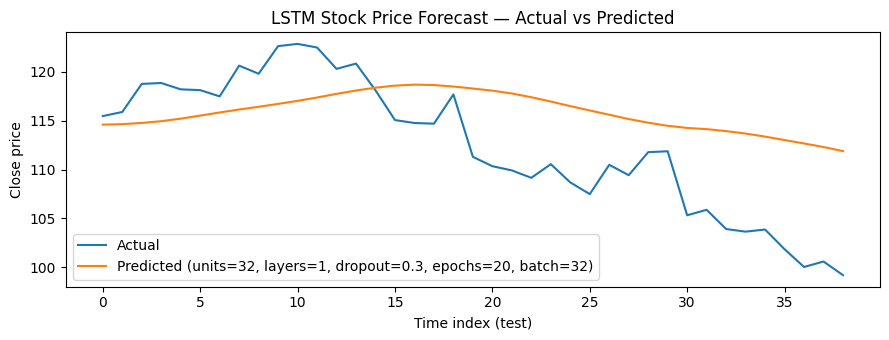


Training config: units=32, layers=1, dropout=0.3, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09712 | Test Loss (MAE): 0.09712


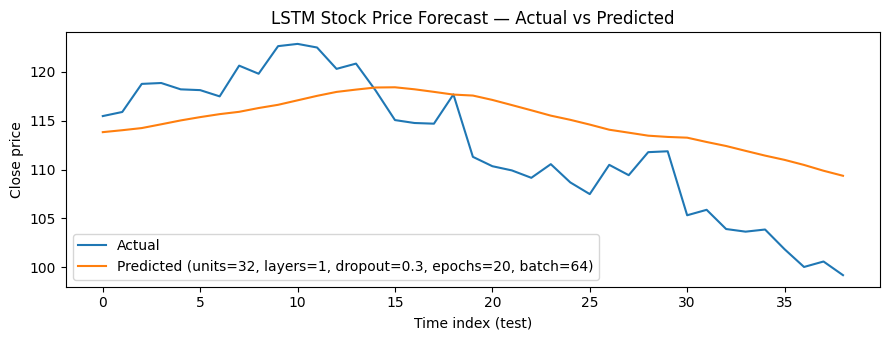


Training config: units=32, layers=1, dropout=0.3, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.08986 | Test Loss (MAE): 0.08986


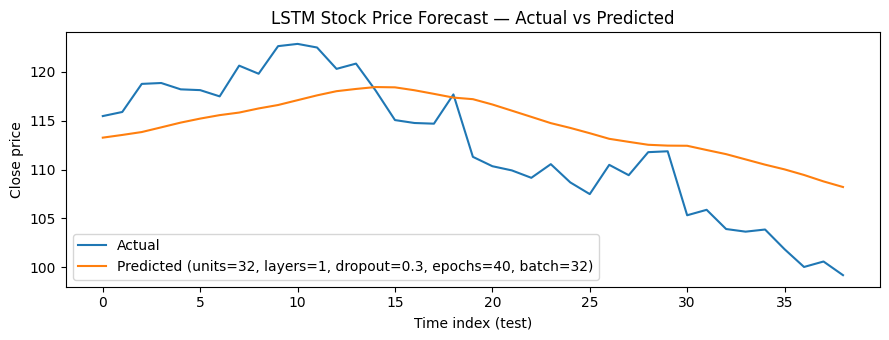


Training config: units=32, layers=1, dropout=0.3, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10517 | Test Loss (MAE): 0.10517


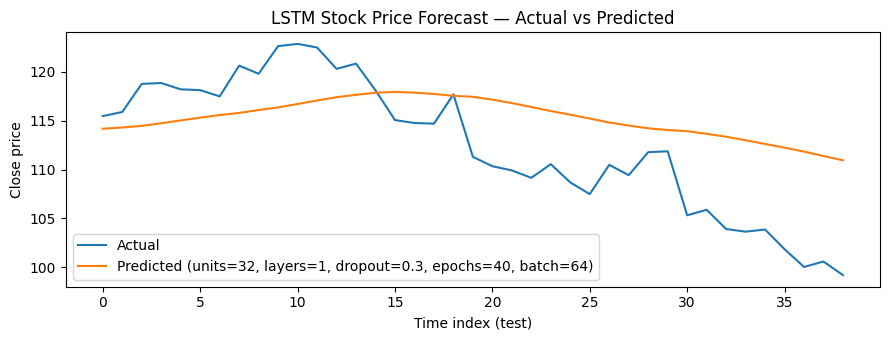


Training config: units=32, layers=1, dropout=0.5, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10754 | Test Loss (MAE): 0.10754


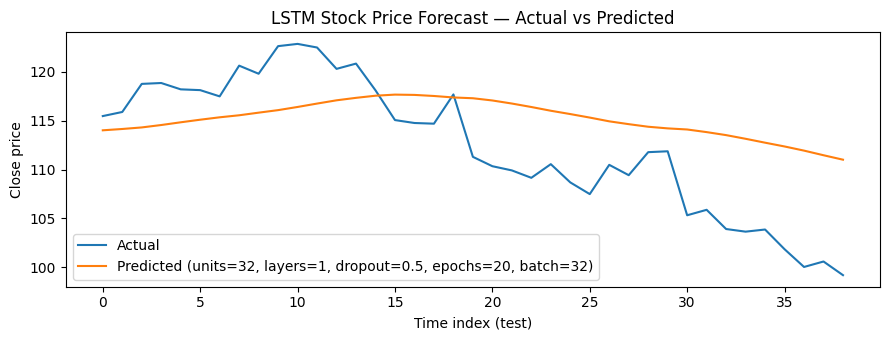


Training config: units=32, layers=1, dropout=0.5, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09903 | Test Loss (MAE): 0.09903


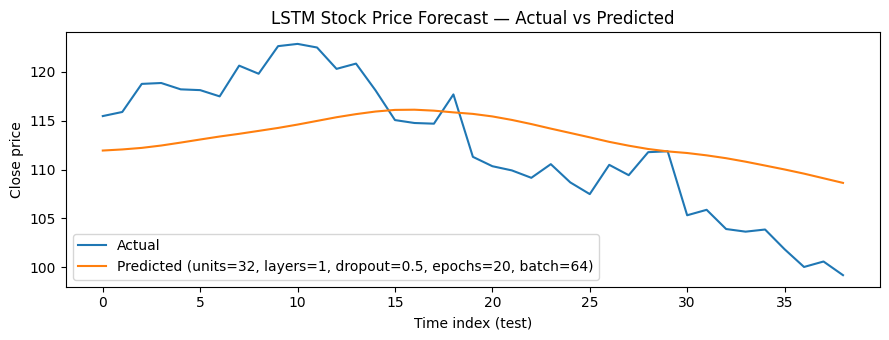


Training config: units=32, layers=1, dropout=0.5, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10075 | Test Loss (MAE): 0.10075


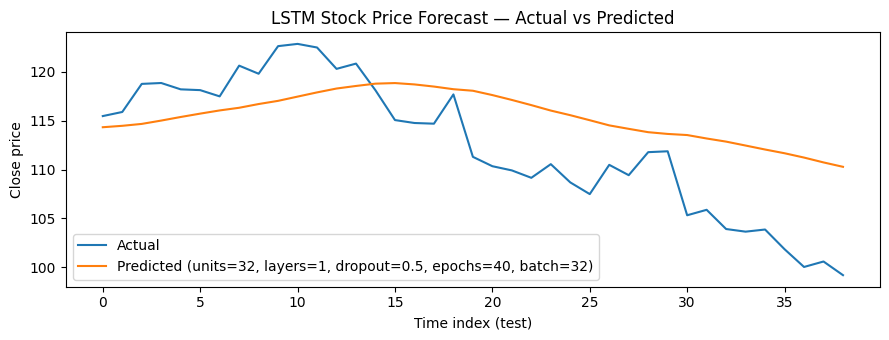


Training config: units=32, layers=1, dropout=0.5, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10085 | Test Loss (MAE): 0.10085


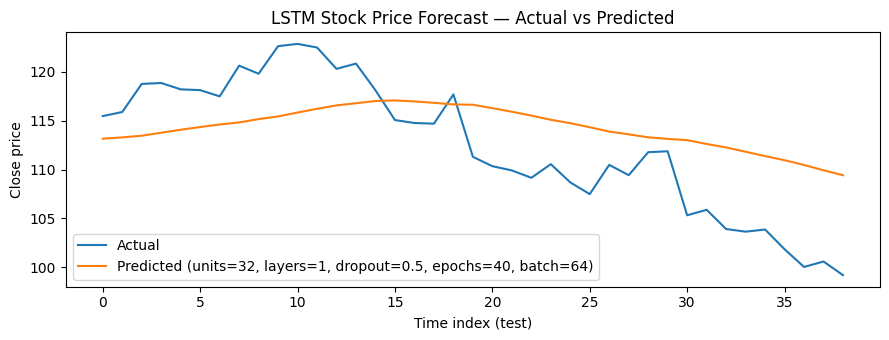


Training config: units=32, layers=2, dropout=0.2, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10584 | Test Loss (MAE): 0.10584


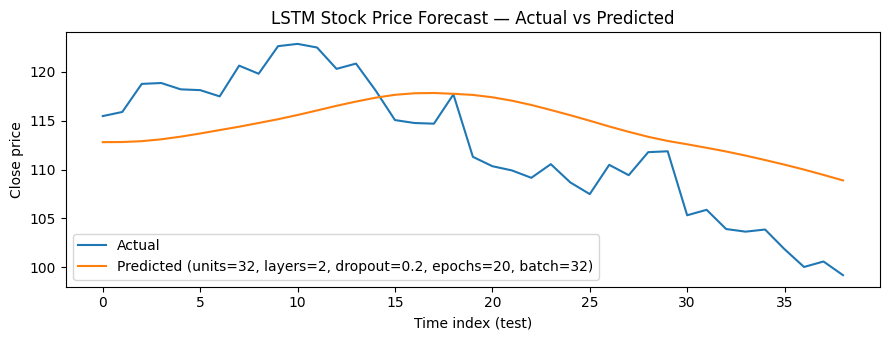


Training config: units=32, layers=2, dropout=0.2, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10729 | Test Loss (MAE): 0.10729


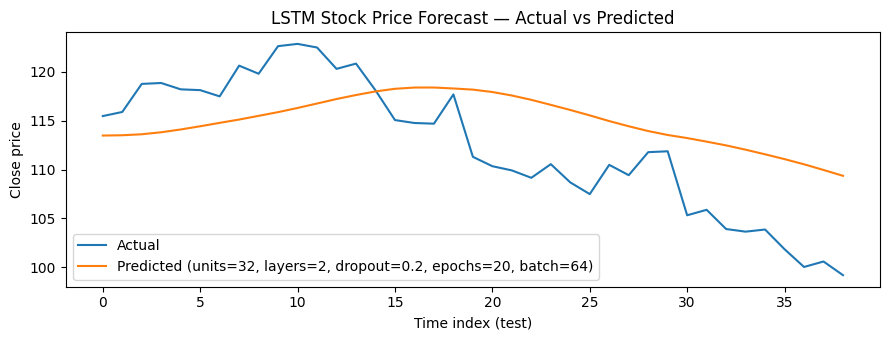


Training config: units=32, layers=2, dropout=0.2, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10888 | Test Loss (MAE): 0.10888


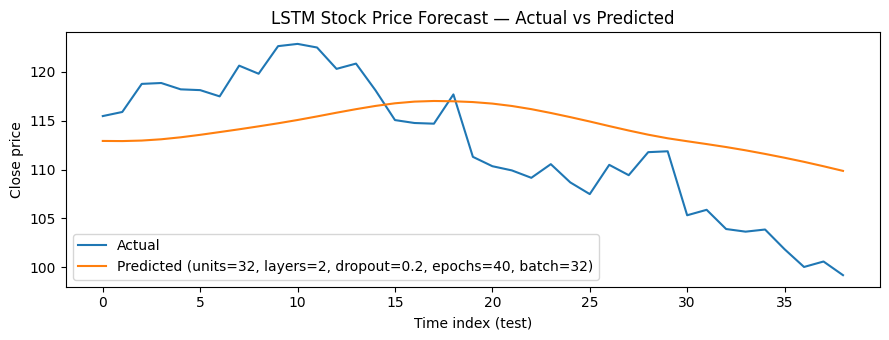


Training config: units=32, layers=2, dropout=0.2, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11234 | Test Loss (MAE): 0.11234


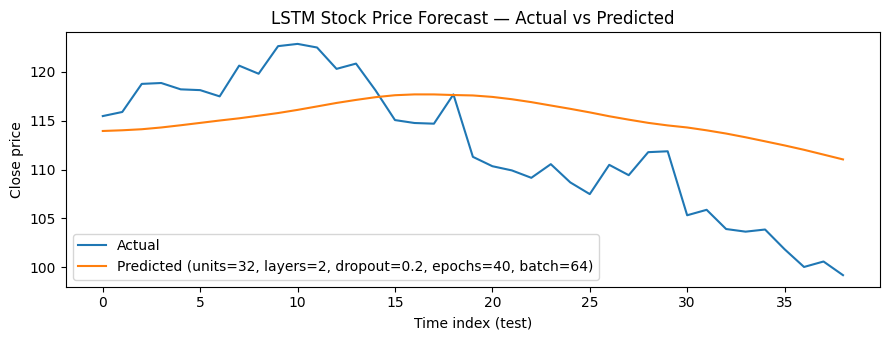


Training config: units=32, layers=2, dropout=0.3, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10122 | Test Loss (MAE): 0.10122


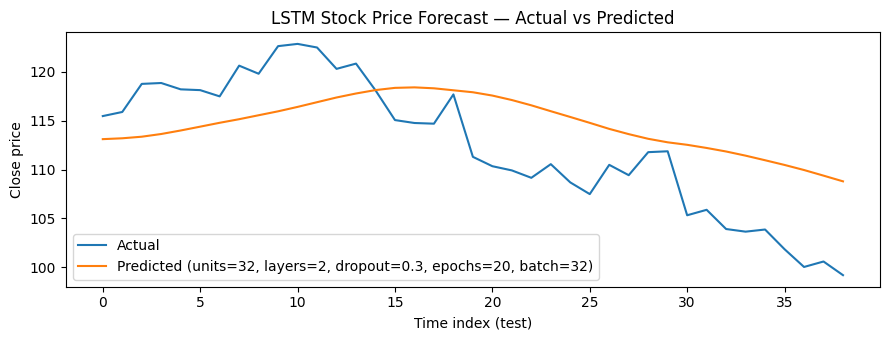


Training config: units=32, layers=2, dropout=0.3, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10714 | Test Loss (MAE): 0.10714


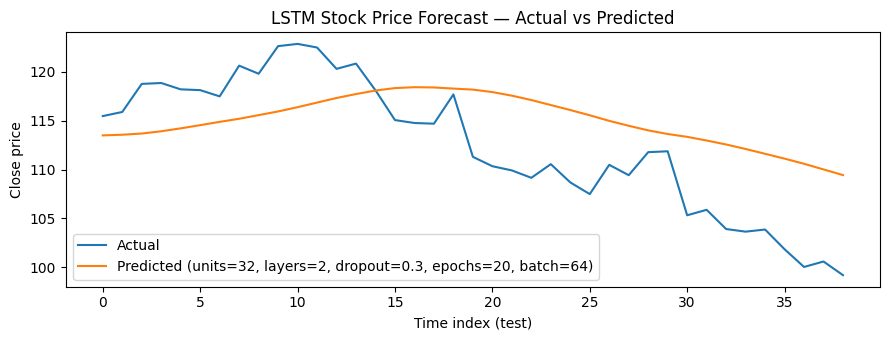


Training config: units=32, layers=2, dropout=0.3, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10660 | Test Loss (MAE): 0.10660


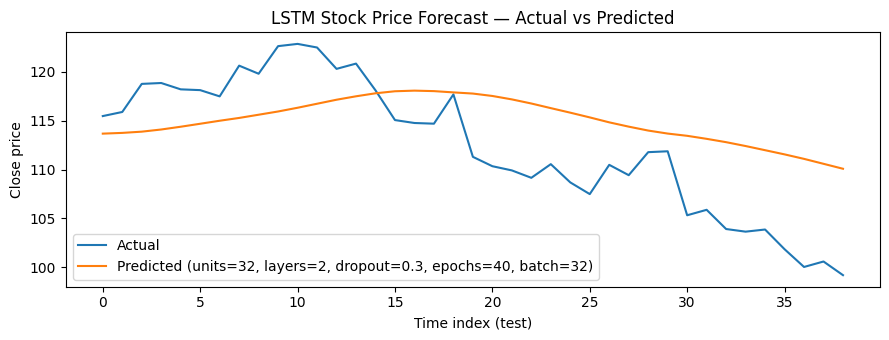


Training config: units=32, layers=2, dropout=0.3, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10558 | Test Loss (MAE): 0.10558


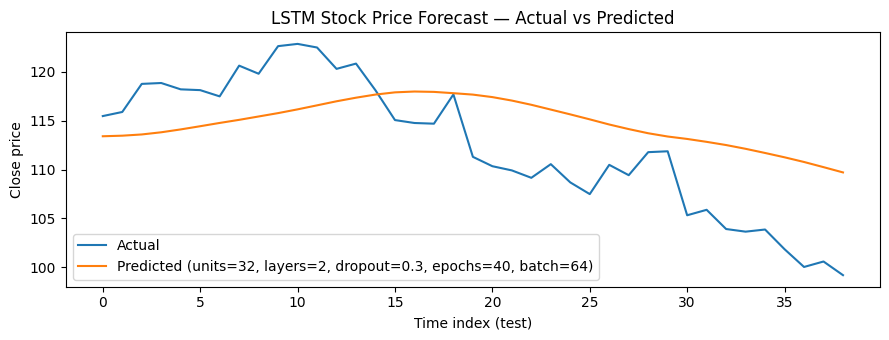


Training config: units=32, layers=2, dropout=0.5, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10294 | Test Loss (MAE): 0.10294


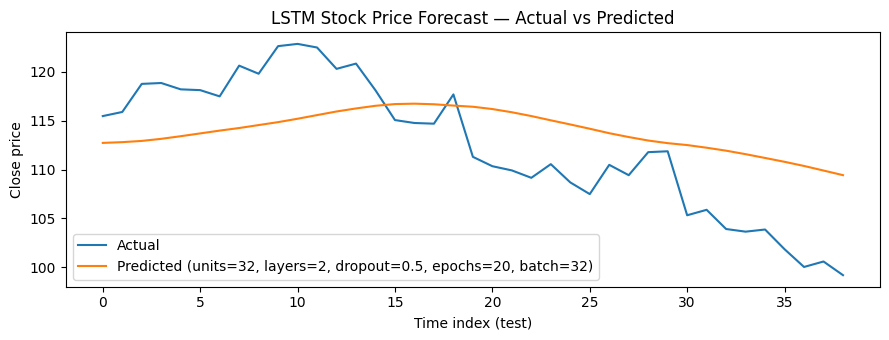


Training config: units=32, layers=2, dropout=0.5, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10680 | Test Loss (MAE): 0.10680


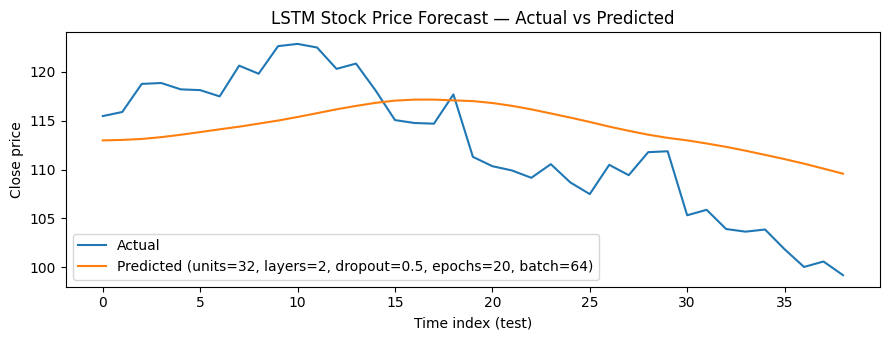


Training config: units=32, layers=2, dropout=0.5, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10917 | Test Loss (MAE): 0.10917


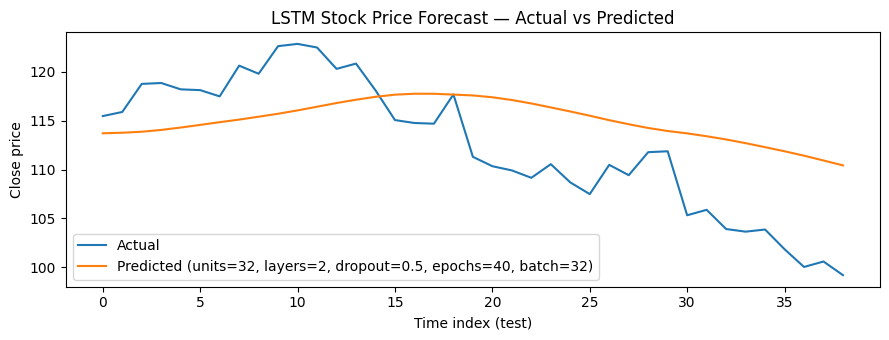


Training config: units=32, layers=2, dropout=0.5, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10516 | Test Loss (MAE): 0.10516


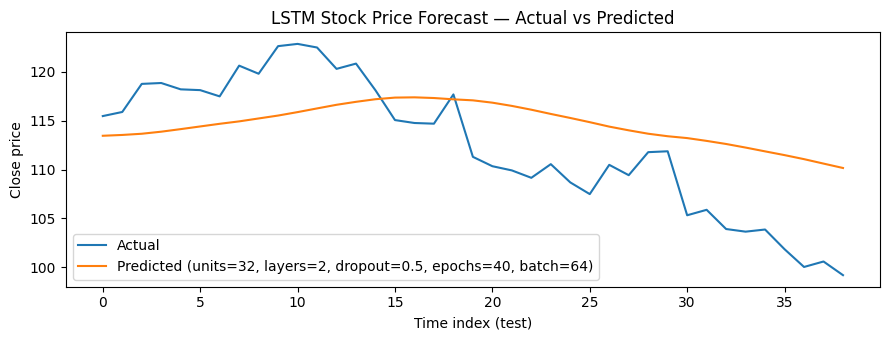


Training config: units=32, layers=3, dropout=0.2, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11964 | Test Loss (MAE): 0.11964


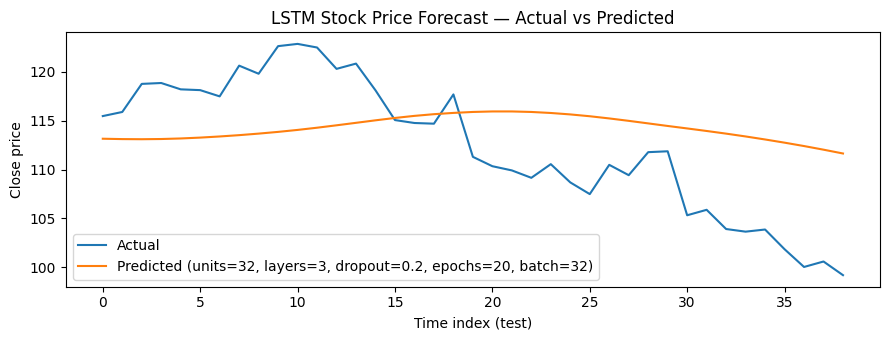


Training config: units=32, layers=3, dropout=0.2, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11806 | Test Loss (MAE): 0.11806


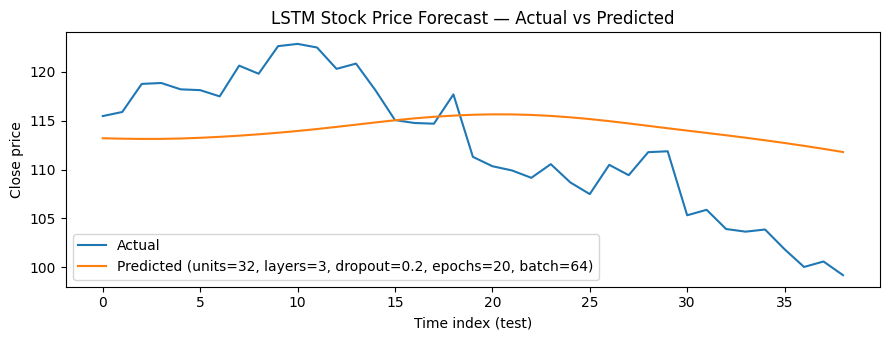


Training config: units=32, layers=3, dropout=0.2, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.12168 | Test Loss (MAE): 0.12168


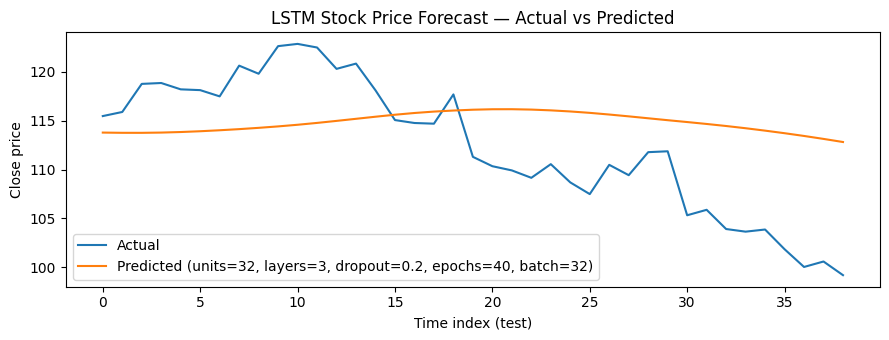


Training config: units=32, layers=3, dropout=0.2, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11504 | Test Loss (MAE): 0.11504


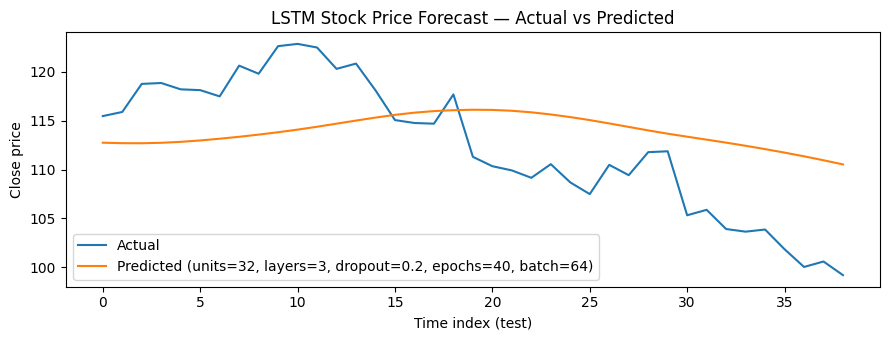


Training config: units=32, layers=3, dropout=0.3, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.12332 | Test Loss (MAE): 0.12332


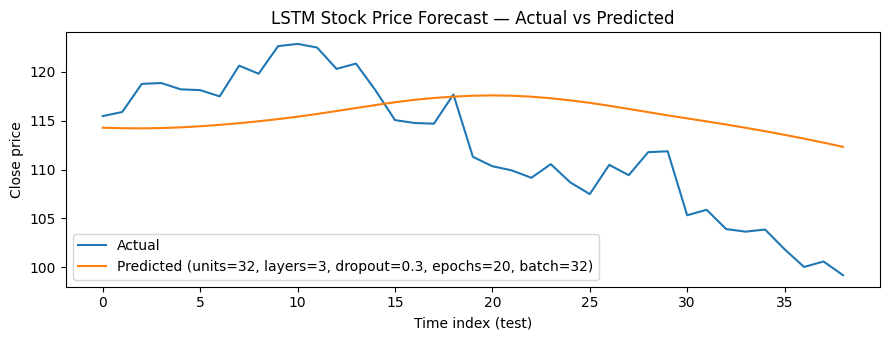


Training config: units=32, layers=3, dropout=0.3, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11713 | Test Loss (MAE): 0.11713


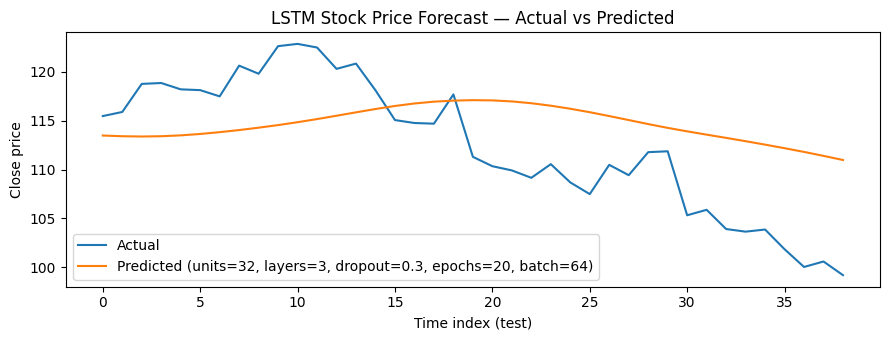


Training config: units=32, layers=3, dropout=0.3, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11773 | Test Loss (MAE): 0.11773


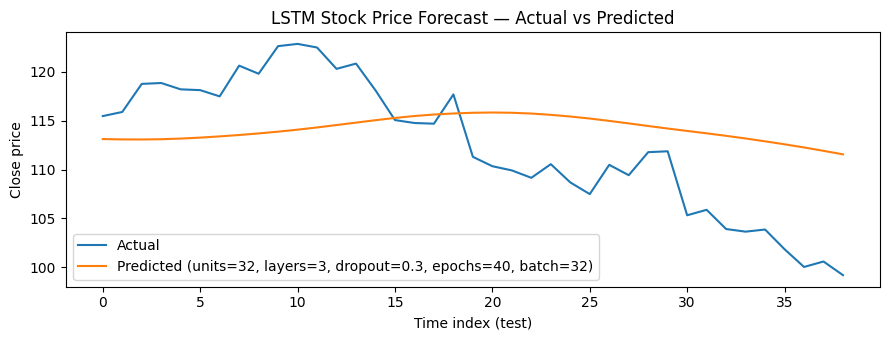


Training config: units=32, layers=3, dropout=0.3, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.12039 | Test Loss (MAE): 0.12039


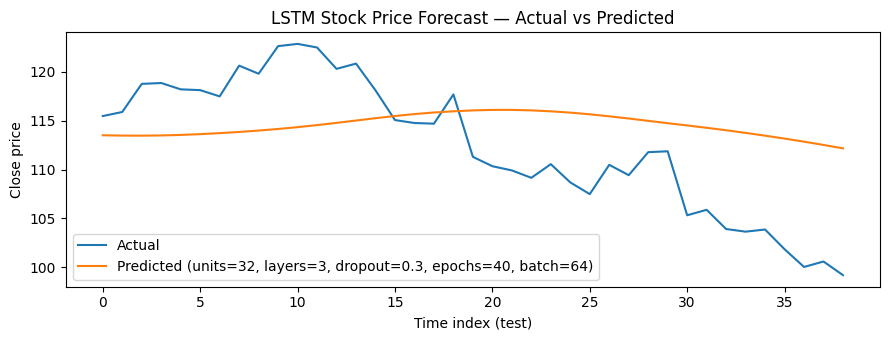


Training config: units=32, layers=3, dropout=0.5, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11938 | Test Loss (MAE): 0.11938


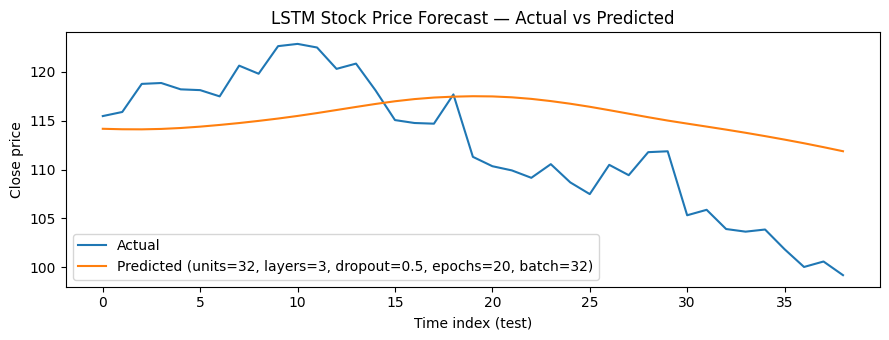


Training config: units=32, layers=3, dropout=0.5, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11435 | Test Loss (MAE): 0.11435


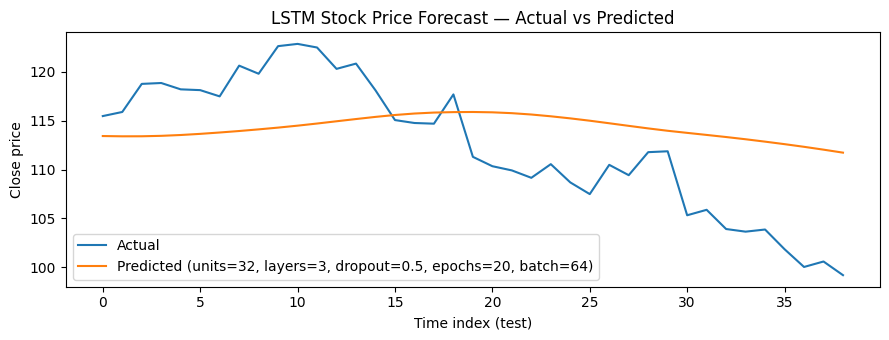


Training config: units=32, layers=3, dropout=0.5, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11511 | Test Loss (MAE): 0.11511


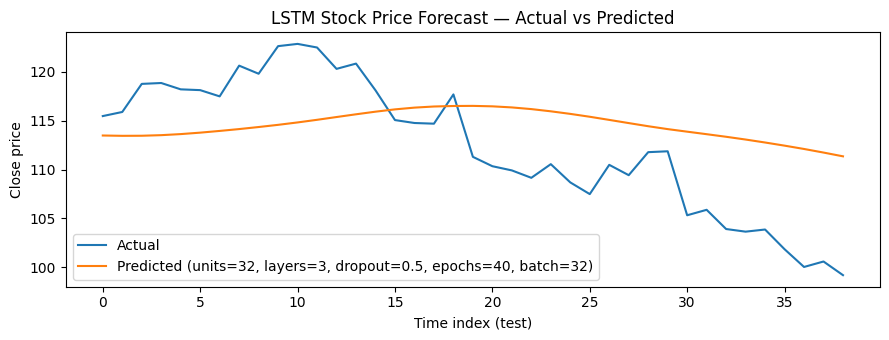


Training config: units=32, layers=3, dropout=0.5, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11651 | Test Loss (MAE): 0.11651


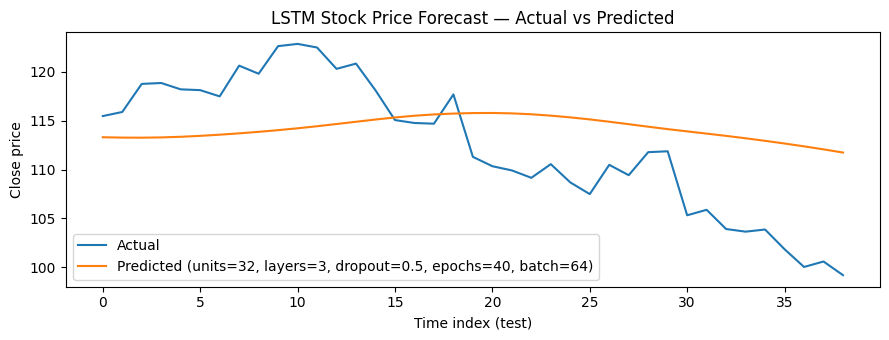


Training config: units=64, layers=1, dropout=0.2, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09899 | Test Loss (MAE): 0.09899


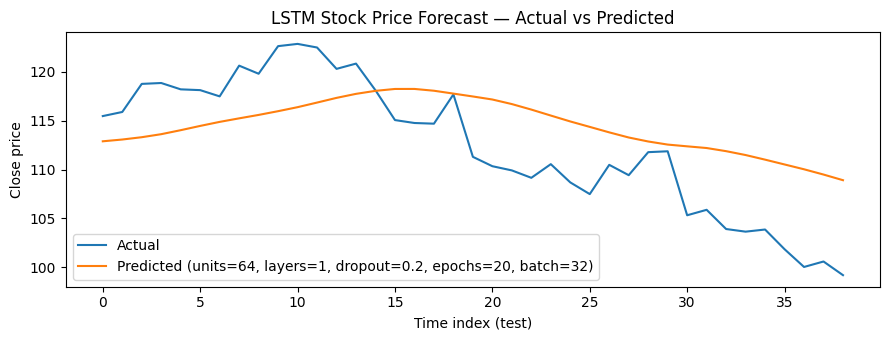


Training config: units=64, layers=1, dropout=0.2, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09583 | Test Loss (MAE): 0.09583


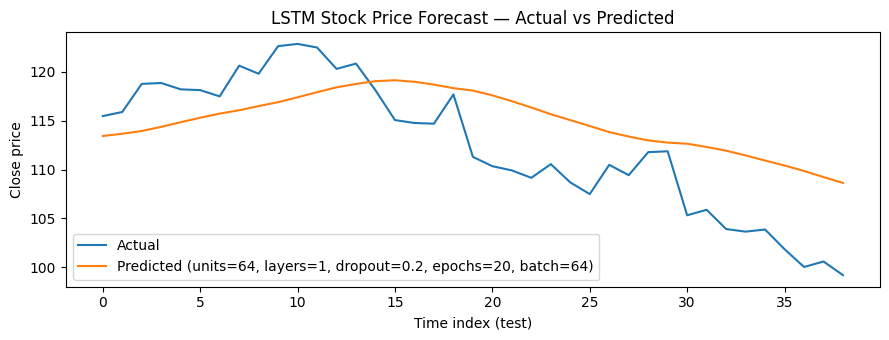


Training config: units=64, layers=1, dropout=0.2, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09918 | Test Loss (MAE): 0.09918


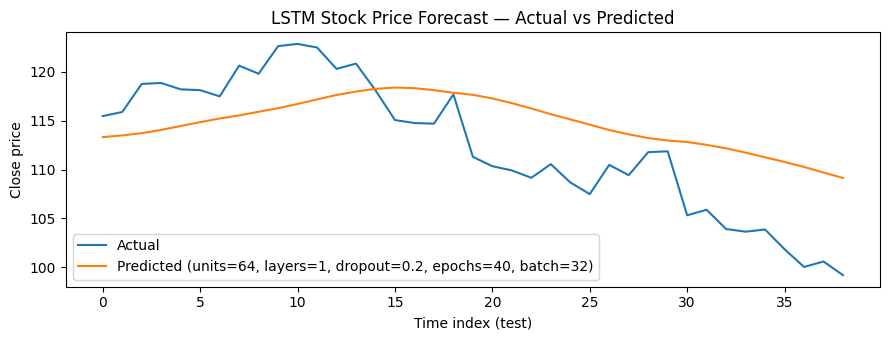


Training config: units=64, layers=1, dropout=0.2, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10295 | Test Loss (MAE): 0.10295


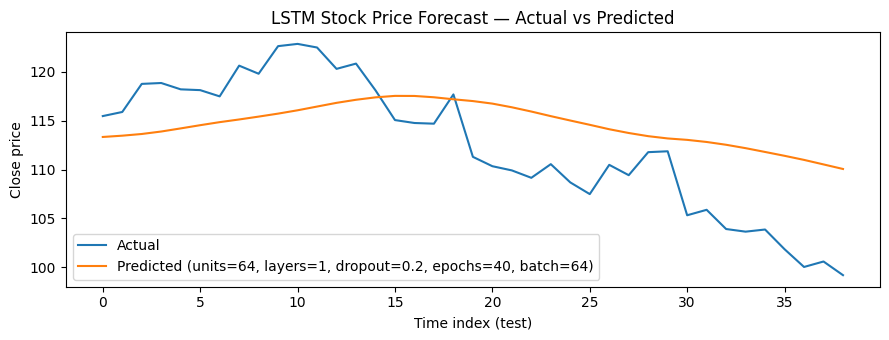


Training config: units=64, layers=1, dropout=0.3, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09003 | Test Loss (MAE): 0.09003


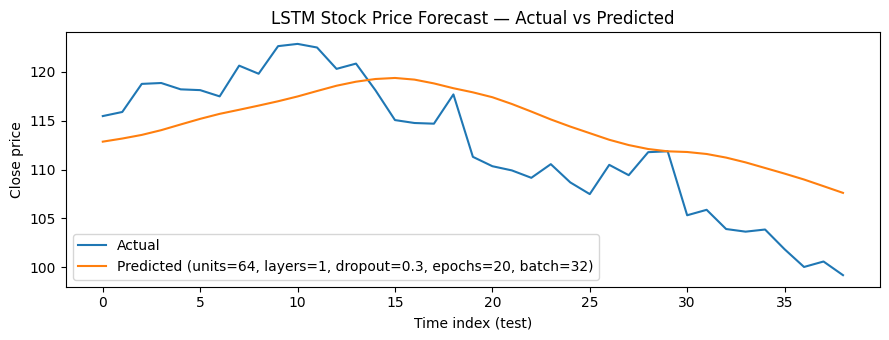


Training config: units=64, layers=1, dropout=0.3, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10168 | Test Loss (MAE): 0.10168


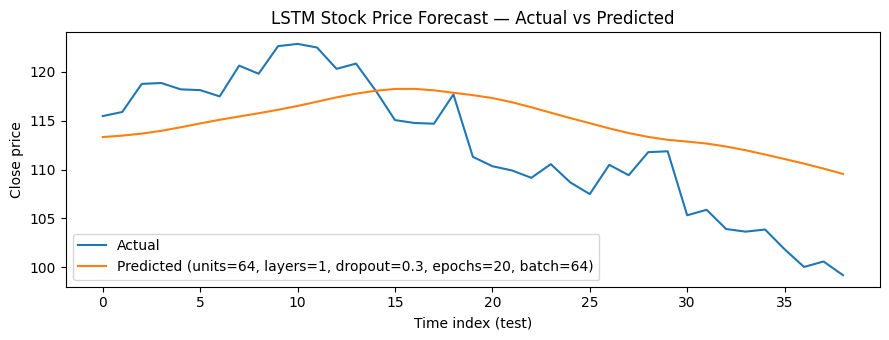


Training config: units=64, layers=1, dropout=0.3, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09237 | Test Loss (MAE): 0.09237


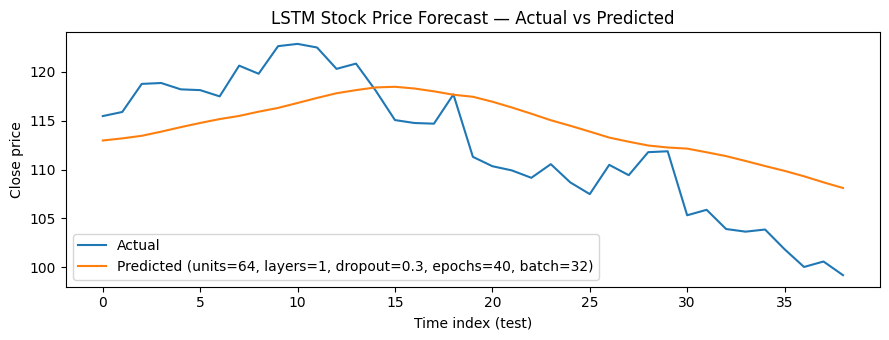


Training config: units=64, layers=1, dropout=0.3, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09919 | Test Loss (MAE): 0.09919


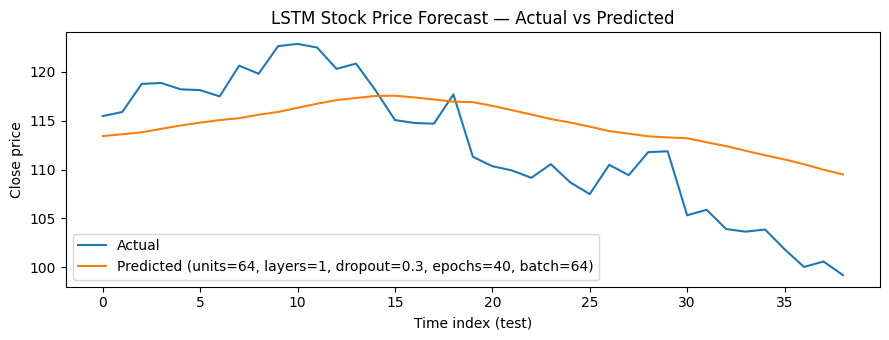


Training config: units=64, layers=1, dropout=0.5, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09472 | Test Loss (MAE): 0.09472


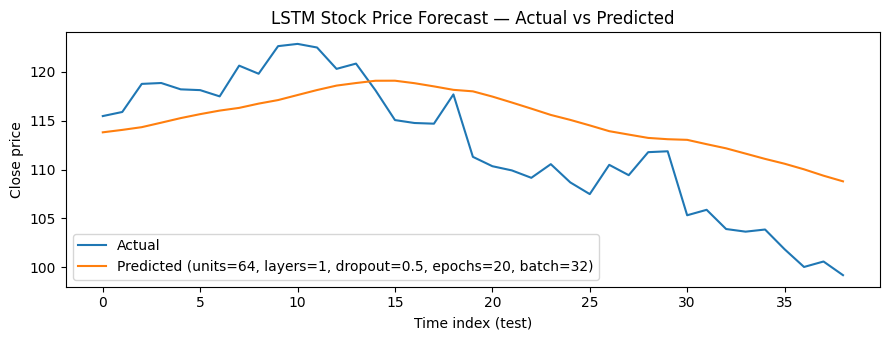


Training config: units=64, layers=1, dropout=0.5, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.08893 | Test Loss (MAE): 0.08893


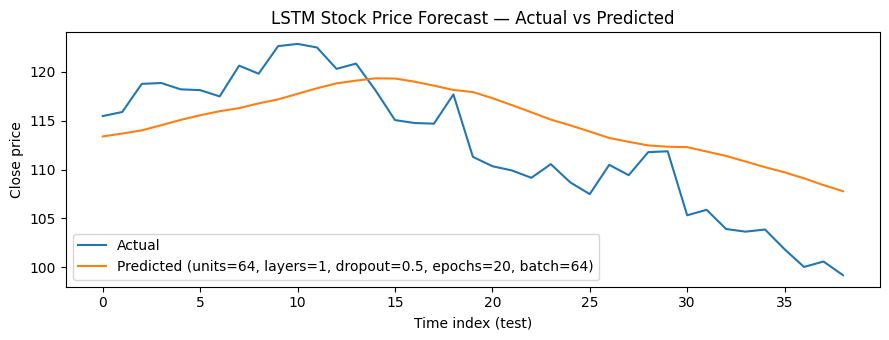


Training config: units=64, layers=1, dropout=0.5, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10074 | Test Loss (MAE): 0.10074


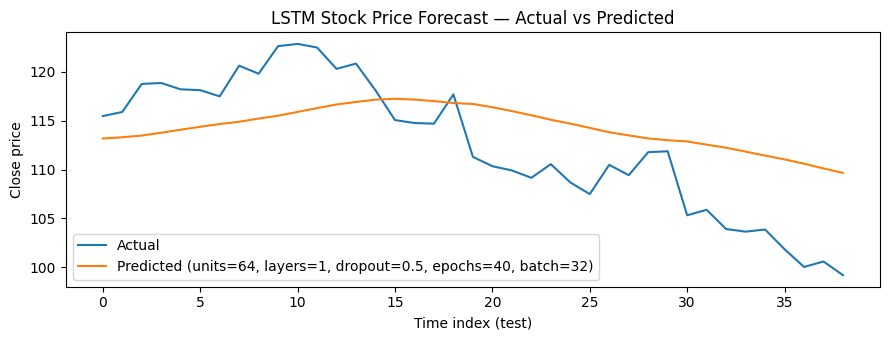


Training config: units=64, layers=1, dropout=0.5, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10410 | Test Loss (MAE): 0.10410


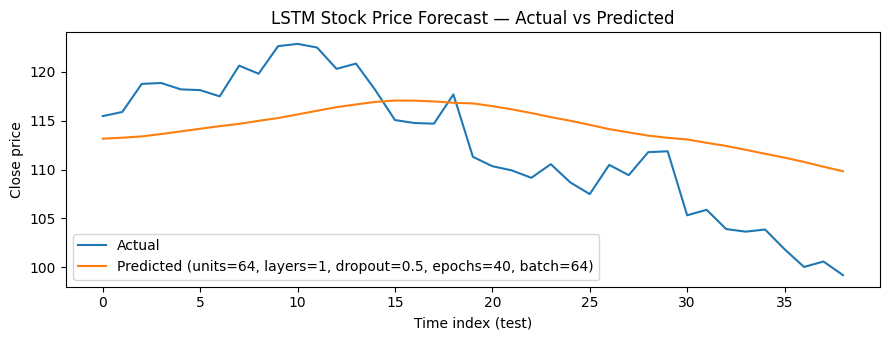


Training config: units=64, layers=2, dropout=0.2, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10537 | Test Loss (MAE): 0.10537


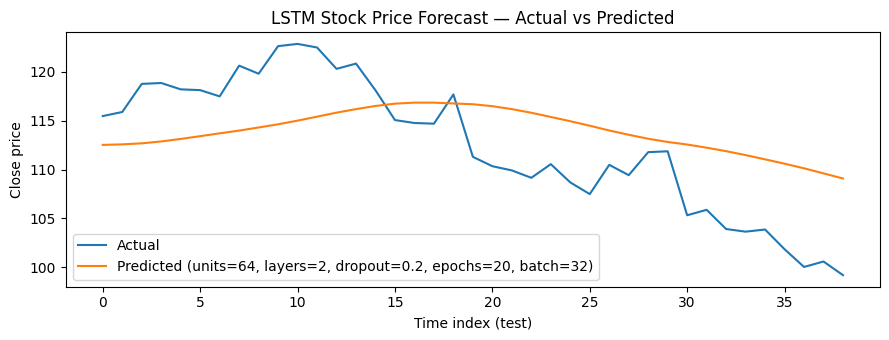


Training config: units=64, layers=2, dropout=0.2, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10932 | Test Loss (MAE): 0.10932


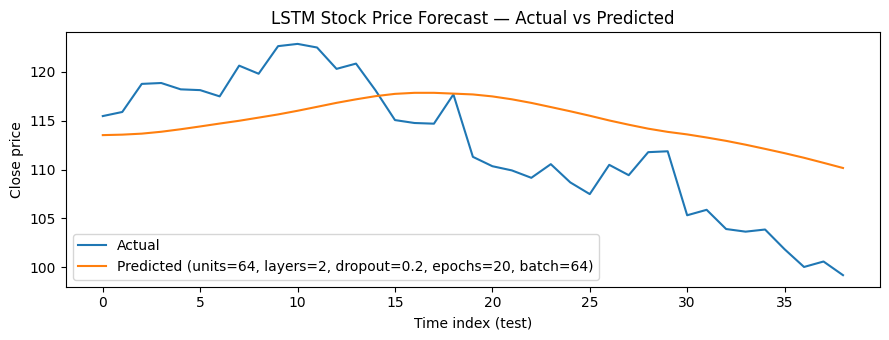


Training config: units=64, layers=2, dropout=0.2, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.12263 | Test Loss (MAE): 0.12263


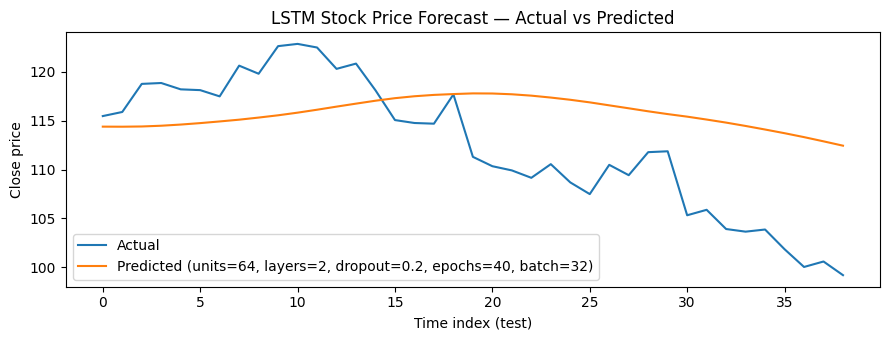


Training config: units=64, layers=2, dropout=0.2, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10421 | Test Loss (MAE): 0.10421


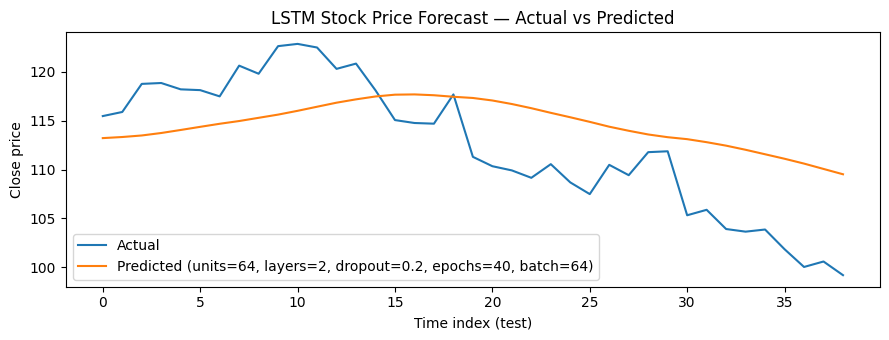


Training config: units=64, layers=2, dropout=0.3, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10975 | Test Loss (MAE): 0.10975


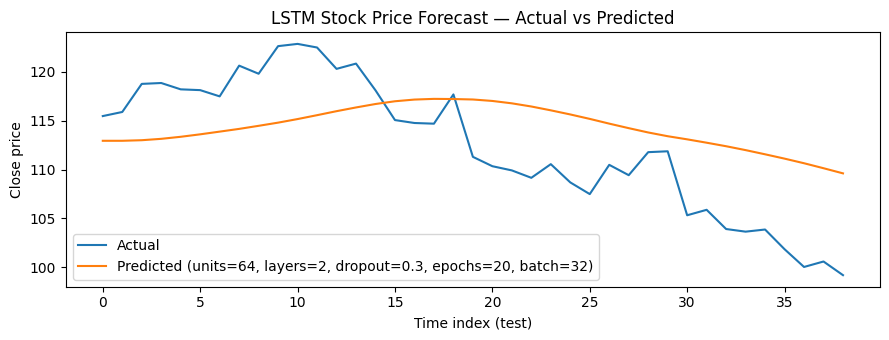


Training config: units=64, layers=2, dropout=0.3, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10435 | Test Loss (MAE): 0.10435


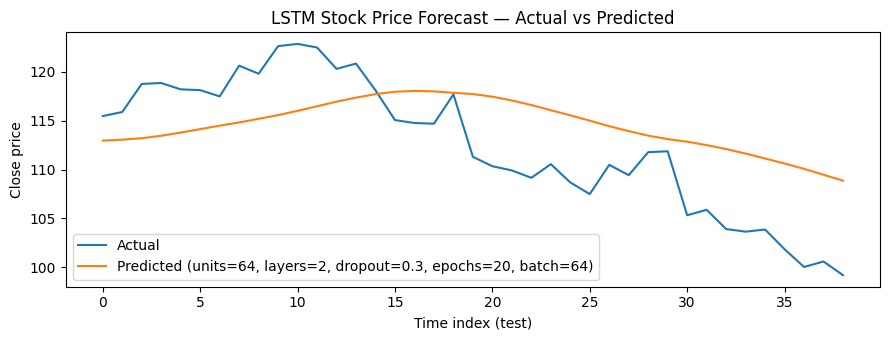


Training config: units=64, layers=2, dropout=0.3, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10654 | Test Loss (MAE): 0.10654


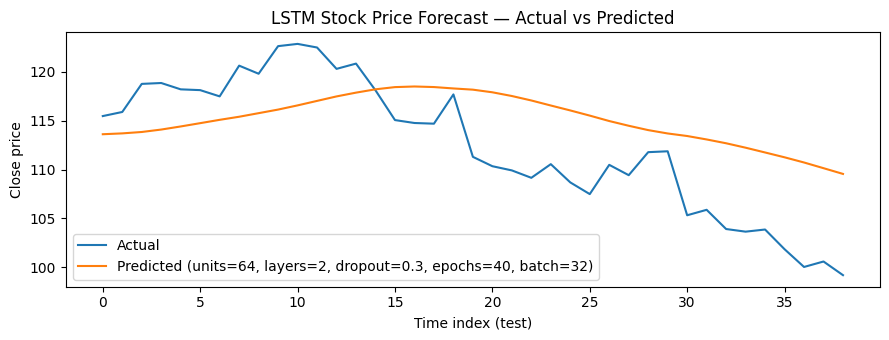


Training config: units=64, layers=2, dropout=0.3, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11082 | Test Loss (MAE): 0.11082


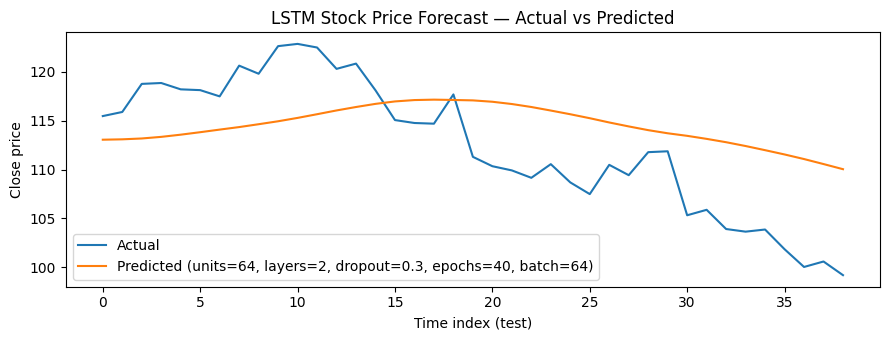


Training config: units=64, layers=2, dropout=0.5, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11039 | Test Loss (MAE): 0.11039


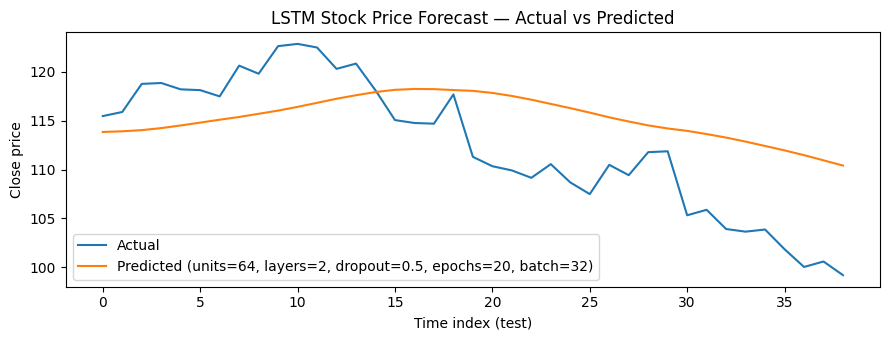


Training config: units=64, layers=2, dropout=0.5, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.09656 | Test Loss (MAE): 0.09656


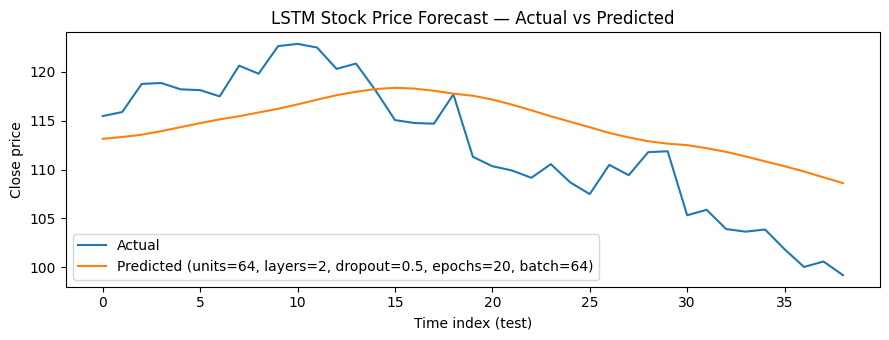


Training config: units=64, layers=2, dropout=0.5, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10735 | Test Loss (MAE): 0.10735


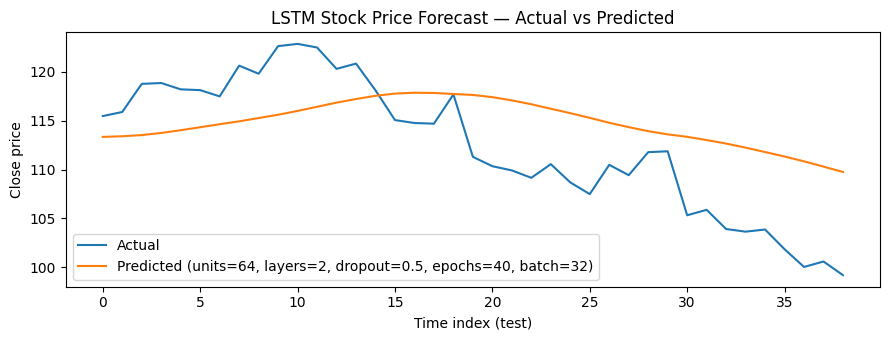


Training config: units=64, layers=2, dropout=0.5, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.10795 | Test Loss (MAE): 0.10795


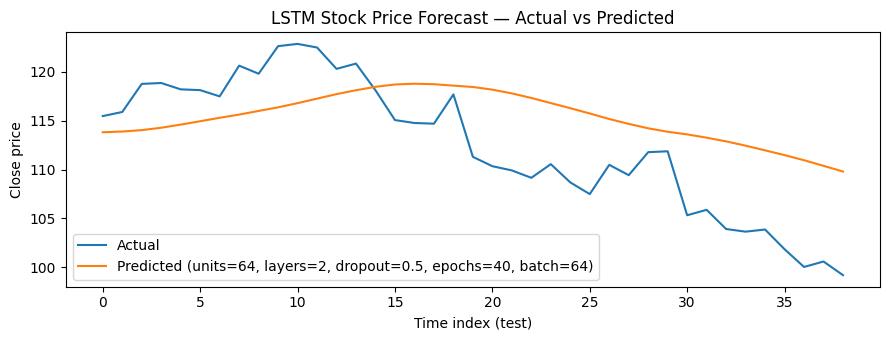


Training config: units=64, layers=3, dropout=0.2, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11098 | Test Loss (MAE): 0.11098


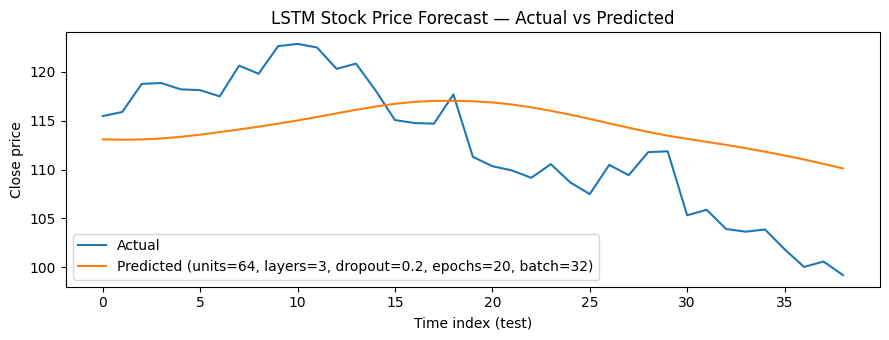


Training config: units=64, layers=3, dropout=0.2, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11948 | Test Loss (MAE): 0.11948


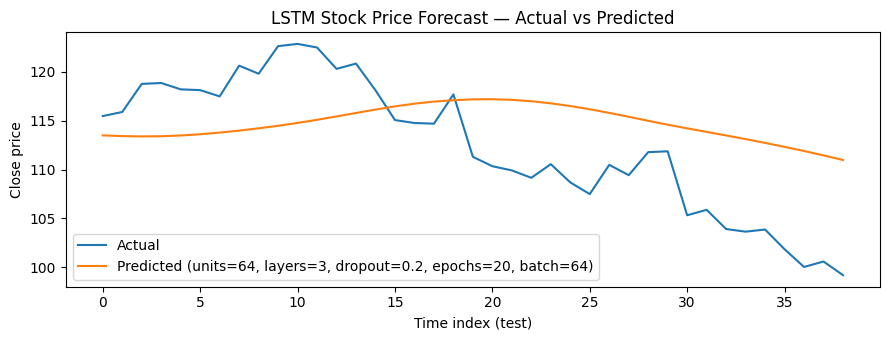


Training config: units=64, layers=3, dropout=0.2, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11980 | Test Loss (MAE): 0.11980


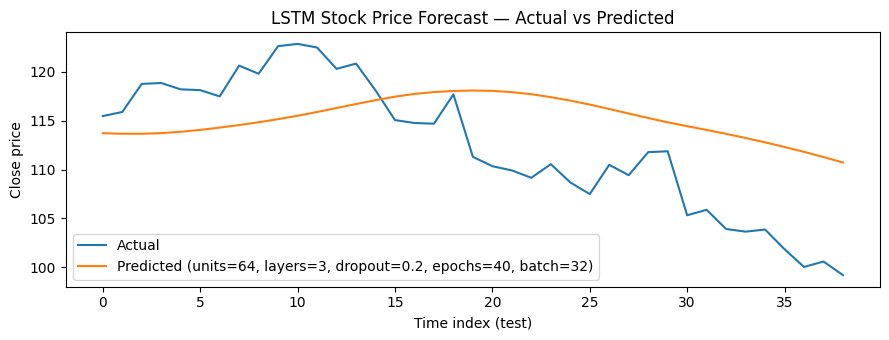


Training config: units=64, layers=3, dropout=0.2, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.12078 | Test Loss (MAE): 0.12078


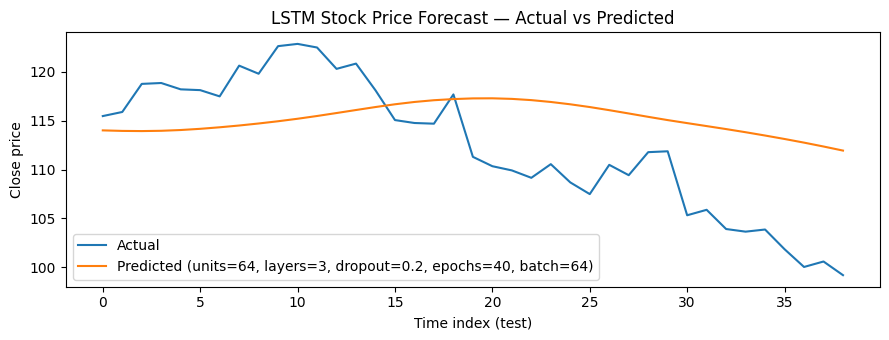


Training config: units=64, layers=3, dropout=0.3, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11853 | Test Loss (MAE): 0.11853


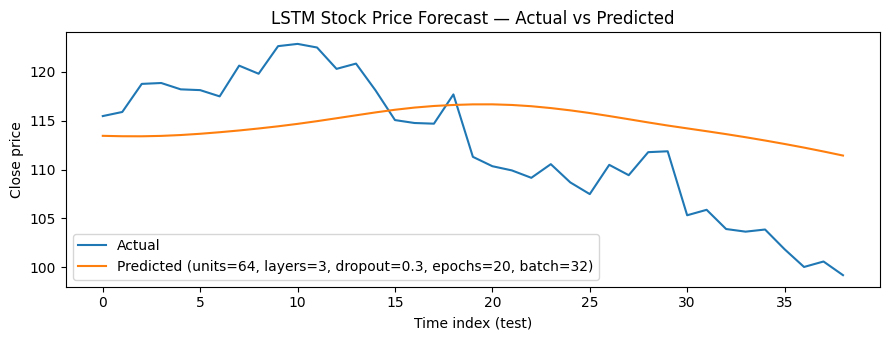


Training config: units=64, layers=3, dropout=0.3, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11474 | Test Loss (MAE): 0.11474


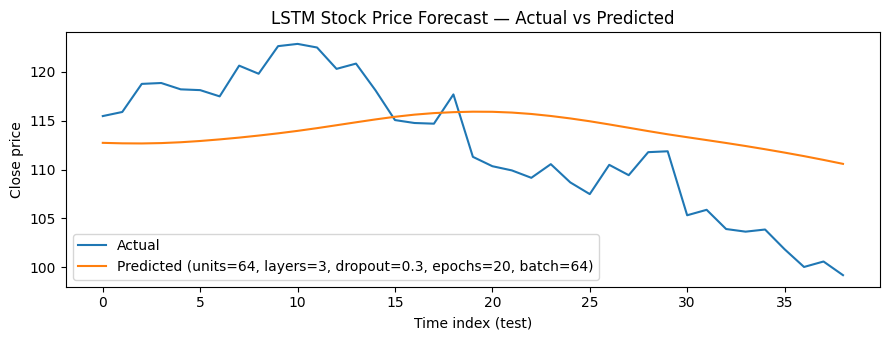


Training config: units=64, layers=3, dropout=0.3, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11843 | Test Loss (MAE): 0.11843


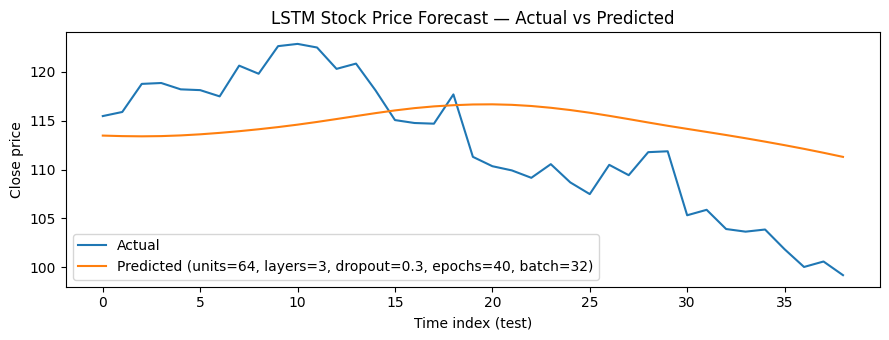


Training config: units=64, layers=3, dropout=0.3, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.12282 | Test Loss (MAE): 0.12282


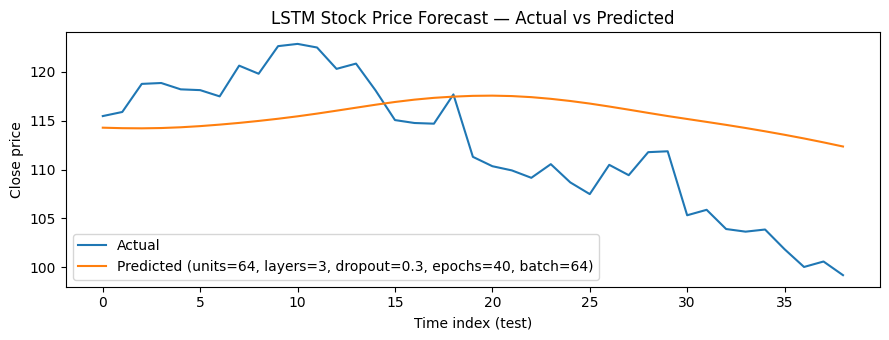


Training config: units=64, layers=3, dropout=0.5, epochs=20, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11884 | Test Loss (MAE): 0.11884


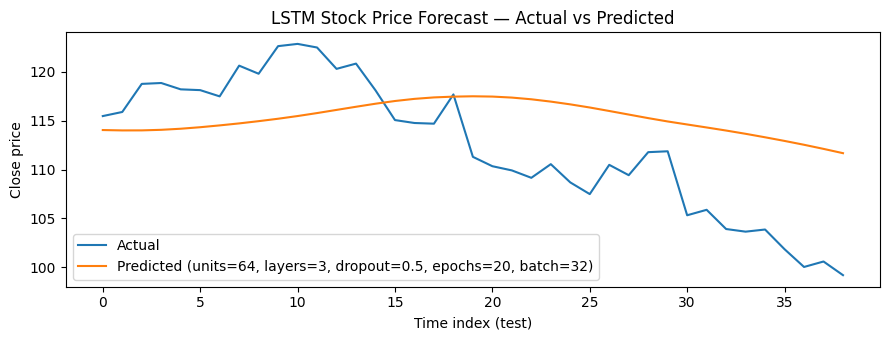


Training config: units=64, layers=3, dropout=0.5, epochs=20, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11713 | Test Loss (MAE): 0.11713


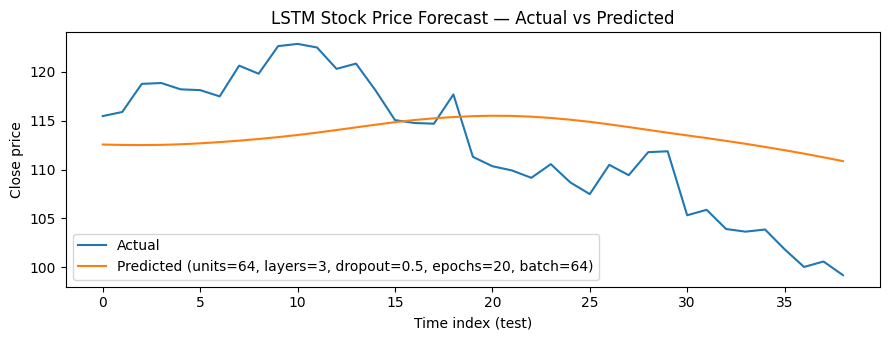


Training config: units=64, layers=3, dropout=0.5, epochs=40, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MAE: 0.11533 | Test Loss (MAE): 0.11533


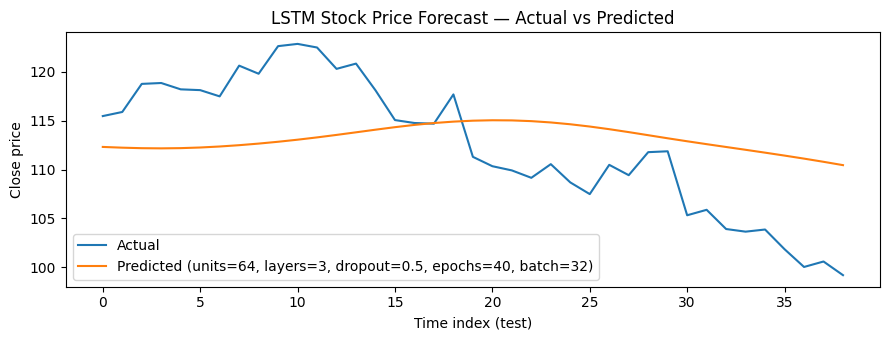


Training config: units=64, layers=3, dropout=0.5, epochs=40, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

def build_lstm_model(time_step, units=50, layers=2, dropout=0.2):
    """Build an LSTM with 'layers' stacked, each with 'units' and dropout."""
    model = Sequential()
    # first layer
    model.add(LSTM(units=units, return_sequences=(layers > 1), input_shape=(time_step, 1)))
    model.add(Dropout(dropout))
    # optional middle layers (if layers >= 3)
    for i in range(max(0, layers - 2)):
        model.add(LSTM(units=units, return_sequences=True))
        model.add(Dropout(dropout))
    # last layer (no return_sequences)
    if layers >= 2:
        model.add(LSTM(units=units, return_sequences=False))
        model.add(Dropout(dropout))
    # output
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mae"])
    return model

# ---- Search space to experiment with ----
units_list = [32, 64, 128]          # change hidden size
layers_list = [1, 2, 3]             # number of stacked LSTM layers
dropout_list = [0.2, 0.3, 0.5]      # regularization strength
epochs_list = [20, 40]              # training epochs
batch_sizes = [32, 64]              # minibatch sizes

# optional early stopping to reduce overfitting/time
es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=0)

results = []

for units in units_list:
    for layers in layers_list:
        for d in dropout_list:
            for epochs in epochs_list:
                for bs in batch_sizes:
                    cfg = f"units={units}, layers={layers}, dropout={d}, epochs={epochs}, batch={bs}"
                    print("\n" + "="*80)
                    print("Training config:", cfg)

                    model = build_lstm_model(time_step=time_step, units=units, layers=layers, dropout=d)
                    history = model.fit(
                        X_train, y_train,
                        validation_split=0.1,
                        epochs=epochs,
                        batch_size=bs,
                        verbose=0,
                        callbacks=[es]
                    )

                    # evaluate
                    loss, mae = model.evaluate(X_test, y_test, verbose=0)
                    print(f"Test MAE: {mae:.5f} | Test Loss (MAE): {loss:.5f}")

                    # predict
                    y_pred = model.predict(X_test, verbose=0).reshape(-1, 1)

                    # if you scaled targets with MinMaxScaler/StandardScaler named 'scaler'
                    try:
                        actual = scaler.inverse_transform(y_test.reshape(-1, 1))
                        pred = scaler.inverse_transform(y_pred)
                    except Exception:
                        actual = y_test.reshape(-1, 1)
                        pred = y_pred

                    # store results
                    results.append({
                        "units": units, "layers": layers, "dropout": d,
                        "epochs": epochs, "batch": bs, "test_mae": float(mae)
                    })

                    # plot
                    plt.figure(figsize=(9,3.5))
                    plt.plot(actual, label="Actual")
                    plt.plot(pred, label=f"Predicted ({cfg})")
                    plt.title("LSTM Stock Price Forecast — Actual vs Predicted")
                    plt.xlabel("Time index (test)")
                    plt.ylabel("Close price")
                    plt.legend()
                    plt.tight_layout()
                    plt.show()

# sort & print the top few configs
results_sorted = sorted(results, key=lambda r: r["test_mae"])
print("\nTop configs by Test MAE:")
for r in results_sorted[:5]:
    print(r)

In [14]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1642 - mae: 0.1642
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1408 - mae: 0.1408
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1479 - mae: 0.1479
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.1305 - mae: 0.1305
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 0.1278 - mae: 0.1278
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.1207 - mae: 0.1207
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.1320 - mae: 0.1320
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.1255 - mae: 0.1255
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1332 - mae: 0.1332
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1318 - mae: 0.1318
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1272 - mae: 0.1272
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.1281 - mae: 0.1281
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 

In [15]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 406ms/step


In [16]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

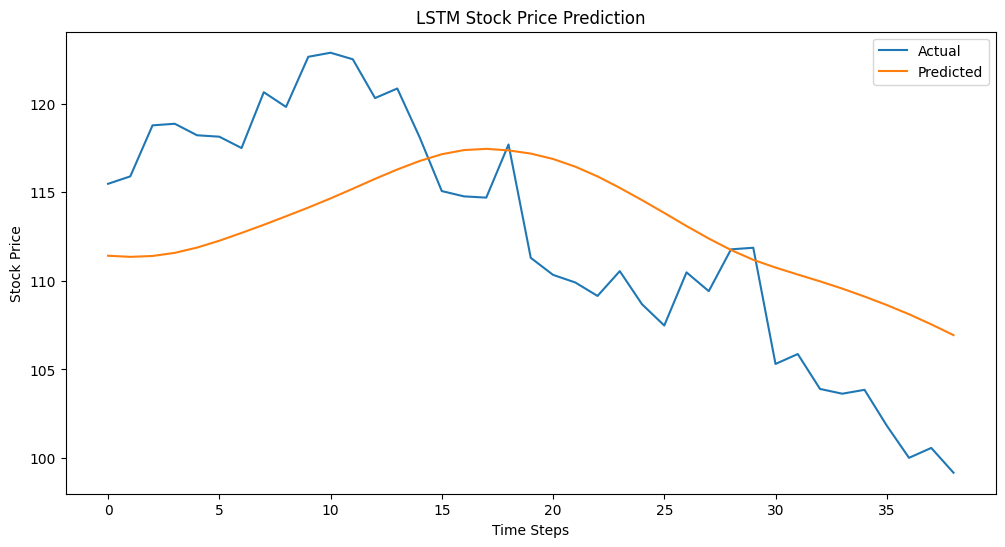

In [17]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


**Why normalize the ‘Close’ prices before LSTM?**

To put values on a consistent scale so gradients are stable and the network converges faster; it also prevents large-magnitude features from dominating the loss.

**Purpose of the Dropout layer?**

Regularization. It randomly disables a fraction of units during training to reduce co-adaptation, lowering overfitting and improving generalization.

**If the predicted line closely follows the actual line in the plot?**

It indicates the model captured the underlying dynamics/trend well and generalizes to unseen data (low error).